# Exploratory data analysis in Python for Facebook Dataset


## 1. Importing the required libraries for EDA

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)



---



## 2. Loading the data into the data frame.

In [ ]:
from google.colab import files
uploaded = files.upload()           

Saving pseudo_facebook.csv to pseudo_facebook.csv


In [ ]:
import pandas as pd
df=pd.read_csv('pseudo_facebook.csv')


In [ ]:
df.head(5)

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [ ]:
df.tail(5) # To display the botton 5 rows

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
98998,1268299,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820
99000,1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092
99001,1468023,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756
99002,1397896,39,15,1974,5,female,397.0,2049,768,9410,12443,9410,9530,0,2913


## 3. Checking the types of data

In [ ]:
df.dtypes

userid                     int64
age                        int64
dob_day                    int64
dob_year                   int64
dob_month                  int64
gender                    object
tenure                   float64
friend_count               int64
friendships_initiated      int64
likes                      int64
likes_received             int64
mobile_likes               int64
mobile_likes_received      int64
www_likes                  int64
www_likes_received         int64
dtype: object

In [ ]:
# computing number of rows
rows = len(df.axes[0])
  
# computing number of columns
cols = len(df.axes[1])
  
print(df)
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

        userid  age  ...  www_likes  www_likes_received
0      2094382   14  ...          0                   0
1      1192601   14  ...          0                   0
2      2083884   14  ...          0                   0
3      1203168   14  ...          0                   0
4      1733186   14  ...          0                   0
...        ...  ...  ...        ...                 ...
98998  1268299   68  ...        491                6202
98999  1256153   18  ...          2                2820
99000  1195943   15  ...          0                1092
99001  1468023   23  ...          0                 756
99002  1397896   39  ...          0                2913

[99003 rows x 15 columns]
Number of Rows:  99003
Number of Columns:  15




---



In [ ]:
df.shape

(99003, 15)

In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape)

Number of duplicate rows:  (0, 15)


Now let us remove the duplicate data because it's ok to remove them.

In [ ]:
df.count() # Used to count the number of rows

userid                   99003
age                      99003
dob_day                  99003
dob_year                 99003
dob_month                99003
gender                   98828
tenure                   99001
friend_count             99003
friendships_initiated    99003
likes                    99003
likes_received           99003
mobile_likes             99003
mobile_likes_received    99003
www_likes                99003
www_likes_received       99003
dtype: int64

In [ ]:
df.count()

userid                   99003
age                      99003
dob_day                  99003
dob_year                 99003
dob_month                99003
gender                   98828
tenure                   99001
friend_count             99003
friendships_initiated    99003
likes                    99003
likes_received           99003
mobile_likes             99003
mobile_likes_received    99003
www_likes                99003
www_likes_received       99003
dtype: int64

# Renaming

In [ ]:
df = df.rename(columns={"likes": "Likes","userid": "User ID","age": "Age","gender": "Gender", "friend_count": "Friends", "www_likes": "Web Likes" })
df.head(5)

,User ID,Age,dob_day,dob_year,dob_month,Gender,tenure,Friends,friendships_initiated,Likes,likes_received,mobile_likes,mobile_likes_received,Web Likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0




---



## 7. Dropping the missing or null values.

In [ ]:
print(df.isnull().sum())

User ID                  0
Age                      0
dob_day                  0
dob_year                 0
dob_month                0
Gender                   0
tenure                   0
Friends                  0
friendships_initiated    0
Likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
Web Likes                0
www_likes_received       0
dtype: int64


In [ ]:
df = df.dropna()    # Dropping the missing values.
df.count()

User ID                  98826
Age                      98826
dob_day                  98826
dob_year                 98826
dob_month                98826
Gender                   98826
tenure                   98826
Friends                  98826
friendships_initiated    98826
Likes                    98826
likes_received           98826
mobile_likes             98826
mobile_likes_received    98826
Web Likes                98826
www_likes_received       98826
dtype: int64

In [ ]:
print(df.isnull().sum())   # After dropping the values

User ID                  0
Age                      0
dob_day                  0
dob_year                 0
dob_month                0
Gender                   0
tenure                   0
Friends                  0
friendships_initiated    0
Likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
Web Likes                0
www_likes_received       0
dtype: int64




---



## 8. Detecting Outliers

(array([3.6984e+04, 3.3956e+04, 1.2791e+04, 5.5700e+03, 4.6260e+03,
        3.3220e+03, 1.0370e+03, 5.1300e+02, 1.7000e+01, 1.0000e+01]),
 array([   0. ,  313.9,  627.8,  941.7, 1255.6, 1569.5, 1883.4, 2197.3,
        2511.2, 2825.1, 3139. ]),
 <a list of 10 Patch objects>)

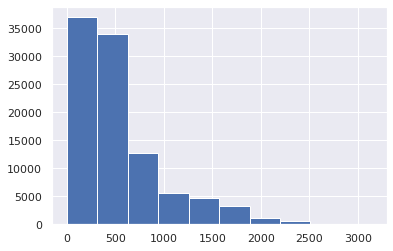

In [ ]:
plt.hist(x=df['tenure'])

(array([58574.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 40252.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

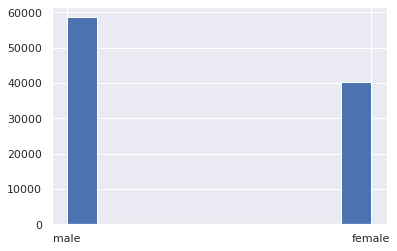

In [ ]:
plt.hist(x=df['Gender'])

(array([31449., 25068., 10986.,  9290.,  8890.,  5911.,  1771.,   744.,
         1417.,  3300.]),
 array([ 13.,  23.,  33.,  43.,  53.,  63.,  73.,  83.,  93., 103., 113.]),
 <a list of 10 Patch objects>)

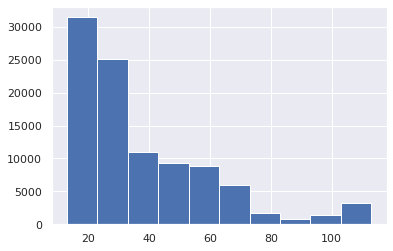

In [ ]:
plt.hist(x=df['Age'])

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

User ID                  596704.25
Age                          30.00
dob_day                      15.00
dob_year                     30.00
dob_month                     6.00
tenure                      447.00
Friends                     175.00
friendships_initiated       100.00
Likes                        80.00
likes_received               58.00
mobile_likes                 46.00
mobile_likes_received        33.00
Web Likes                     7.00
www_likes_received           20.00
dtype: float64


In [ ]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(59172, 15)

## 9. Plots

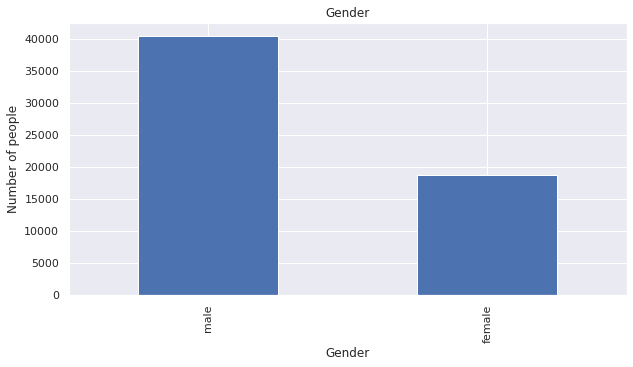

In [ ]:
df.Gender.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Gender")
plt.ylabel('Number of people')
plt.xlabel('Gender');

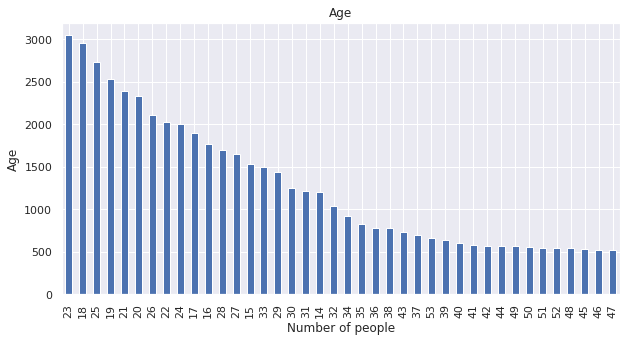

In [ ]:
df.Age.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Age")
plt.ylabel('Age')
plt.xlabel('Number of people');

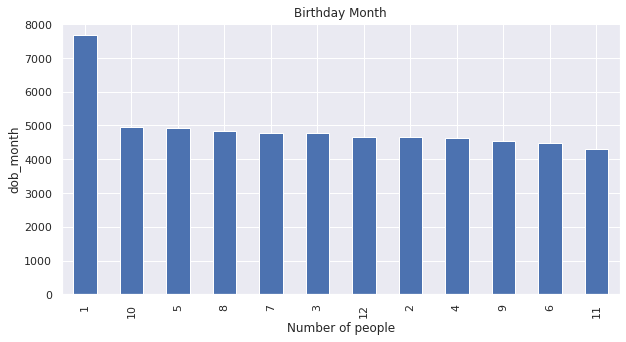

In [ ]:
df.dob_month.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Birthday Month")
plt.ylabel('dob_month')
plt.xlabel('Number of people');

### Heat Maps

Heat Maps is a type of plot which is necessary when we need to find the dependent variables. One of the best way to find the relationship between the features can be done using heat maps. In the below heat map we know that the price feature depends mainly on the Engine Size, Horsepower, and Cylinders.

,User ID,Age,dob_day,dob_year,dob_month,tenure,Friends,friendships_initiated,Likes,likes_received,mobile_likes,mobile_likes_received,Web Likes,www_likes_received
User ID,1.000000,-0.006673,0.001806,0.006673,0.004531,0.002343,-0.000475,-0.000479,0.000102,0.002664,0.000780,0.002069,-0.004711,0.002947
Age,-0.006673,1.000000,0.052200,-1.000000,0.041982,0.270380,-0.199329,-0.200218,0.001450,-0.003154,-0.009384,-0.017702,0.075613,0.023220
dob_day,0.001806,0.052200,1.000000,-0.052200,0.151912,0.050773,0.039490,0.030051,0.020906,0.027245,0.018593,0.026866,0.018141,0.020135
dob_year,0.006673,-1.000000,-0.052200,1.000000,-0.041982,-0.270380,0.199329,0.200218,-0.001450,0.003154,0.009384,0.017702,-0.075613,-0.023220
dob_month,0.004531,0.041982,0.151912,-0.041982,1.000000,0.026718,0.032362,0.027914,0.016758,0.026900,0.015298,0.027292,0.011800,0.018538
tenure,0.002343,0.270380,0.050773,-0.270380,0.026718,1.000000,0.207997,0.131114,0.017711,0.046727,0.008337,0.036066,0.067024,0.052061
Friends,-0.000475,-0.199329,0.039490,0.199329,0.032362,0.207997,1.000000,0.882580,0.176311,0.281166,0.168777,0.268275,0.069609,0.223515
friendships_initiated,-0.000479,-0.200218,0.030051,0.200218,0.027914,0.131114,0.882580,1.000000,0.160935,0.225605,0.153610,0.217682,0.066661,0.175107
Likes,0.000102,0.001450,0.020906,-0.001450,0.016758,0.017711,0.176311,0.160935,1.000000,0.530890,0.989934,0.527432,0.167248,0.385473
likes_received,0.002664,-0.003154,0.027245,0.003154,0.026900,0.046727,0.281166,0.225605,0.530890,1.000000,0.518306,0.943337,0.139228,0.813894


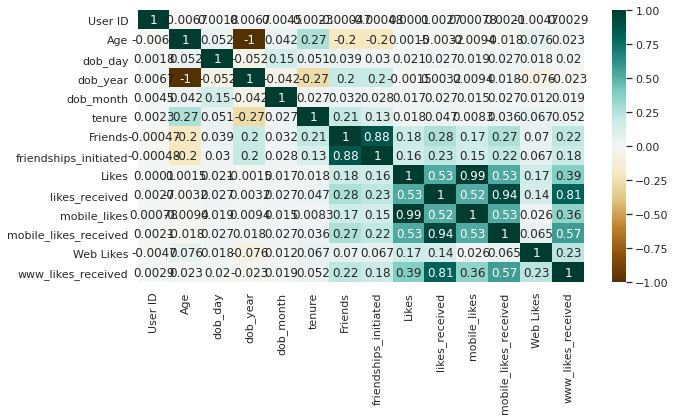

In [ ]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

### Scatterplot

We generally use scatter plots to find the correlation between two variables. Here the scatter plots are plotted between Horsepower and Price and we can see the plot below. With the plot given below, we can easily draw a trend line. These features provide a good scattering of points.

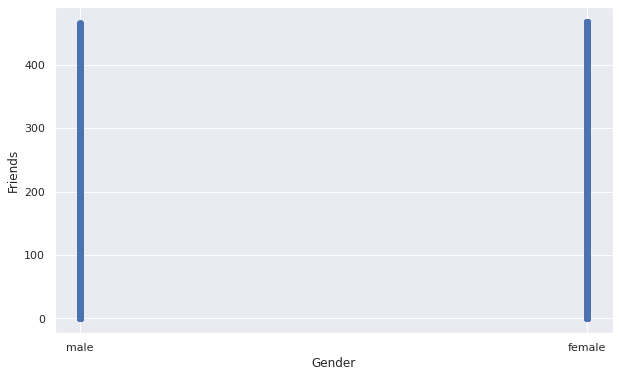

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Gender'], df['Friends'])
ax.set_xlabel('Gender')
ax.set_ylabel('Friends')
plt.show()

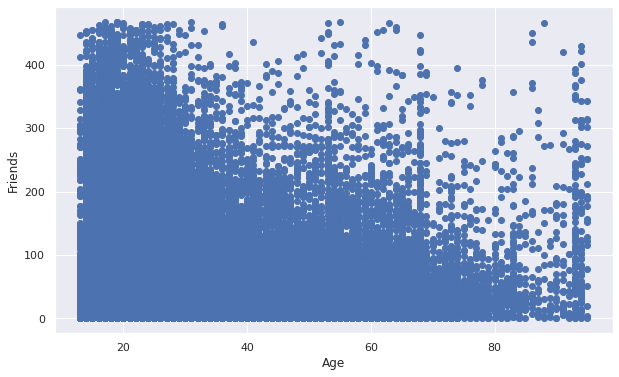

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Age'], df['Friends'])
ax.set_xlabel('Age')
ax.set_ylabel('Friends')
plt.show()

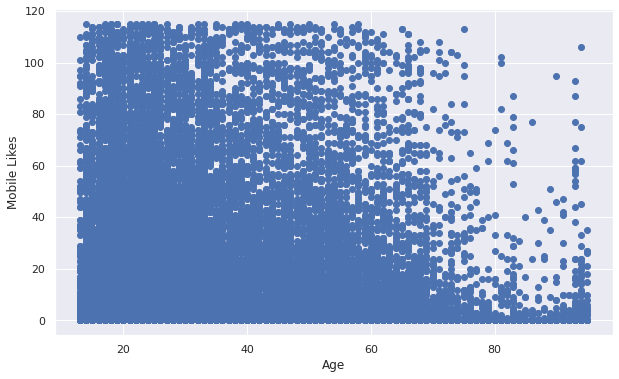

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Age'], df['mobile_likes'])
ax.set_xlabel('Age')
ax.set_ylabel('Mobile Likes')
plt.show()

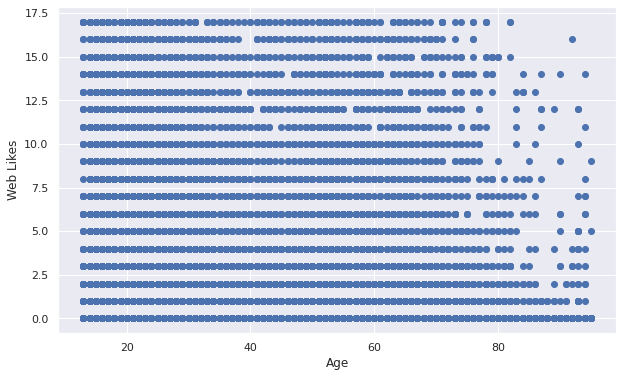

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Age'], df['Web Likes'])
ax.set_xlabel('Age')
ax.set_ylabel('Web Likes')
plt.show()